## Preprocessing et Modéle de Regression 

* jeu de donnée : [Cliquer ici](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

#### Importation des packages 

In [88]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#### Importation du jeu de données 

In [125]:
actual_path =  os.getcwd()

target_path = "/Users/ibrahima/Documents/MyGitRepository/Machine-Learning-Course/dataset_house_price"
os.chdir(target_path)

df = pd.read_csv("train.csv").drop(columns=["Id"])
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


## Preprocessing(Pré-traitemnet)

## Le but:

> mettre les données sous un format propice pour develloper un modéle de machinde learning

#### Mettre les données dans un format propice au ML :

- Séparer le jeux de données en ( Trainset / Testset)
- Encodage des variables
- Nettoyage des NaN
------------------------------------
#### Améliorer la performance du modéle :

- Faire du Feature Selection
- Faire du Feature Engeinnering
- Feature Scaling
- Delete the Outliers


#### Separation du jeu de données 

In [126]:
target_name = 'SalePrice'
y = df.loc[:, target_name]
X = df.drop(columns=[target_name])

X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.75, random_state=12)

#### Traitement des valeurs manquantes


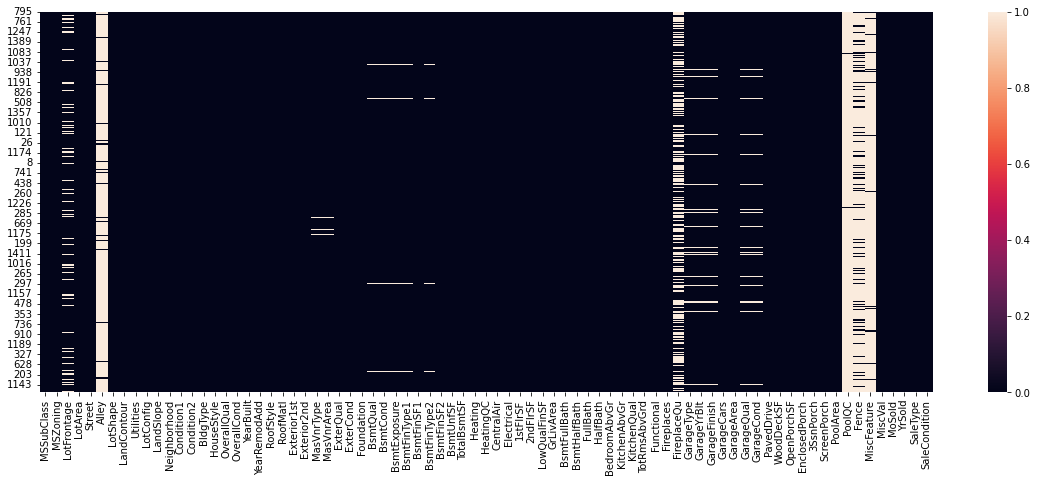

In [127]:
def plot_missing_values(df):
    """trace une carte des valeurs manquantes

    Args:
        df (data frame ): un tableau en entrée 
    """
    plt.figure(figsize=(20, 7)) 
    sns.heatmap(df.isnull())

plot_missing_values(X_train)

In [139]:
missing_rate = (X_train.isnull().sum() / X_train.shape[0] ).sort_values(ascending=False)
remove_columns = missing_rate[missing_rate>0.70].index.to_list()

def missing_value(X, y): 
    """traite les valeurs manquantes 

    Args:
        df (data frame ): tableau de donnée 

    Returns:
        data frame : tableau de donnée 
    """
    X= X.drop(columns=remove_columns, axis=1)
    return df.dropna()

X_train = missing_value(X_train)


plot_missing_values(X_train)

TypeError: missing_value() missing 1 required positional argument: 'y'

#### Encodage des valeurs mmanquantes 

In [121]:
def seperate(df): 
    """separe le data frame selon le type 

    Args:
        df (Data Frame): cest un data frame 

    Return: 
        Retourne deux data frame 
    """

    categorical_columns = df.select_dtypes(include=["object"]).columns.to_list()
    len(categorical_columns)

    numerical_columns = df.select_dtypes(exclude=["object"]).columns.to_list()
    len(categorical_columns)
    return df[numerical_columns], df[categorical_columns]


In [129]:
remove_columns

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [100]:
def encoding(df): 
    encoder = LabelEncoder()
    for col in df.columns: 
        df.loc[:,col] = encoder.fit_transform(df[col])
    return df 


In [107]:
def preprocessing(df): 
    df  = missing_value(df)
    df_num, df_cat = seperate(df)
    df_cat_encode  = encoding(df_cat)
    df = pd.concat([df_num, df_cat])
    return df

In [109]:
X_train_pre = preprocessing(X_train)

/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/opt/homebrew/Caskroom/miniforge/base/envs/env_tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [110]:
X_train_pre.shape 

(878, 75)

In [111]:
y_train.shape 

(1095,)